In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sklearn
from sklearn import datasets
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
MNIST = datasets.load_digits()

Recall that the distance defined by the dot product is 
$$ d(\boldsymbol x,\boldsymbol y) = \lVert \boldsymbol x - \boldsymbol y \rVert, $$
and the angle defined by the dot product is 
$$ \boldsymbol x^T \boldsymbol y = \lVert \boldsymbol x \rVert \lVert \boldsymbol y \rVert cos \theta$$

In [3]:
def norm(x):
    return np.sqrt(x.dot(x.T))

def distance(x0, x1):
    distance = norm(x0-x1)
    return distance

def angle(x0, x1):
    angle = np.arccos(np.dot(x0.T,x1)/(norm(x0)*norm(x1)))
    return angle 

def pairwise_distance_matrix(X, Y):
    N, D = X.shape
    M, _ = Y.shape
    
    distance_matrix = np.zeros((N, M))
    
    distance_matrix = np.sqrt(-2 * np.dot(X, Y.T) + np.sum(Y**2,axis=1) + np.sum(X**2, axis=1)[:, np.newaxis])

    return distance_matrix 

In [4]:
def plot_vector(v, w):
    
    fig = plt.figure(figsize=(4,4))
    ax = fig.gca()
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.grid()
    ax.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1, 
             length_includes_head=True, linewidth=2, color='r');
    ax.arrow(0, 0, w[0], w[1], head_width=0.05, head_length=0.1, 
             length_includes_head=True, linewidth=2, color='r');

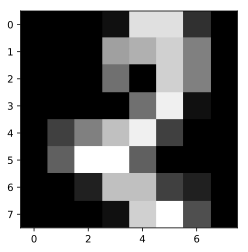

In [5]:
plt.imshow(MNIST.data[MNIST.target==2].reshape(-1, 8, 8)[5], cmap='gray');

But we have the following questions:

1. What does it mean for two digits in the MNIST dataset to be _different_ by our distance function? 
2. Furthermore, how are different classes of digits different for MNIST digits? Let's find out!

In [6]:
def most_similar_image():
    x0 = MNIST.data[0]
    most_similar_index = 1
    prev_distance = distance(x0,MNIST.data[1])

    for i in range(2,MNIST.data.shape[0]):
        dis = distance(x0,MNIST.data[i])
        if dis < prev_distance:
            most_similar_index = i
        else:
            prev_distance = dis
    return most_similar_index 

For the second question, we can compute a `mean` image for each class of image, i.e. we compute mean image for digits of `1`, `2`, `3`,..., `9`, then we compute pairwise distance between them. We can organize the pairwise distances in a 2D plot, which would allow us to visualize the dissimilarity between images of different classes.

In [7]:
means = {}
for n in np.unique(MNIST.target).astype(np.int):
    means[n] = np.mean(MNIST.data[MNIST.target==n], axis=0)

For each pair of classes, we compute the pairwise distance and 
store them into MD (mean distances). We store the angles between the mean digits in AG

In [8]:
MD = np.zeros((10, 10))
AG = np.zeros((10, 10))
for i in means.keys():
    for j in means.keys():
        MD[i,j] = distance(means[i], means[j])
        AG[i,j] = angle(means[i], means[j])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in arccos
  if __name__ == '__main__':


Now we can visualize the distances! Here we put the pairwise distances. The colorbar
shows how the distances map to color intensity.

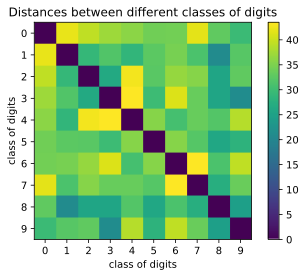

In [9]:
fig, ax = plt.subplots()
grid = ax.imshow(MD, interpolation='nearest')
ax.set(title='Distances between different classes of digits',
       xticks=range(10), 
       xlabel='class of digits',
       ylabel='class of digits',
       yticks=range(10))
fig.colorbar(grid)
plt.show()

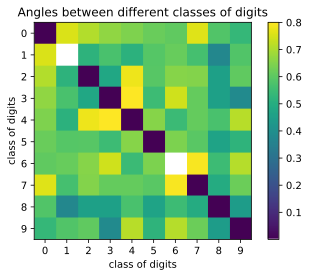

In [10]:
fig, ax = plt.subplots()
grid = ax.imshow(AG, interpolation='nearest')
ax.set(title='Angles between different classes of digits',
       xticks=range(10), 
       xlabel='class of digits',
       ylabel='class of digits',
       yticks=range(10))
fig.colorbar(grid)
plt.show();